In [1]:
# CHECKPOINT = 'spectral-u-net-spectal-first-1575698669.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-max-pool-1576312399.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-mask-1576312649.full.ckpt'
# CHECKPOINT = 'spectral-u-net-mag-only-1576315107.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spectral-naive-normalise-1576384350.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-2-1576389592.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-mask-2-1576389577.full.ckpt'
# CHECKPOINT = 'spectral-u-net-spec-log-norm-mask-3-1576393473.full.ckpt'
CHECKPOINT = 'spectral-u-net-spec-log-norm-3-1576393411.full.ckpt'

In [2]:
branch_suffix = '-'.join(CHECKPOINT.replace('spectral-u-net-', '').split('-')[0:-1])
branch = f'train/{branch_suffix}'
print(branch)

train/spec-log-norm-3


In [3]:
%%bash -s $branch
cd ../../speech-enhancement
git checkout $1

Your branch is up to date with 'origin/train/spec-log-norm-3'.


Switched to branch 'train/spec-log-norm-3'


In [4]:
import numpy as np
from src.datasets import NoisySpectralSpeechDataset
from src.utils import checkpoint, spectral, notebook

In [5]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [6]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()

In [7]:
def reshape_spectrum(arr):
    assert arr.shape == (2, 256, 128)
    arr = np.concatenate([arr, np.zeros([2, 1, 128])], axis=1)
    assert arr.shape == (2, 257, 128)
    arr = np.concatenate([arr, np.zeros([2, 257, 1])], axis=2)
    assert arr.shape == (2, 257, 129)
    return arr

In [8]:
IDX = 124

noisy_spectral, clean_spectral = dataset[IDX]
noisy_arr = spectral.spec_to_audio(reshape_spectrum(noisy_spectral.numpy()))
clean_arr = spectral.spec_to_audio(reshape_spectrum(clean_spectral.numpy()))

In [9]:
noisy_spectral_batch = noisy_spectral.view(1, 2, 256, 128)
pred_clean_spectral_batch = net(noisy_spectral_batch)
pred_clean_spectral = pred_clean_spectral_batch.view(2, 256, 128)

In [10]:
pred_clean_arr = spectral.spec_to_audio(reshape_spectrum(pred_clean_spectral.detach().numpy()))

Pred clean signal


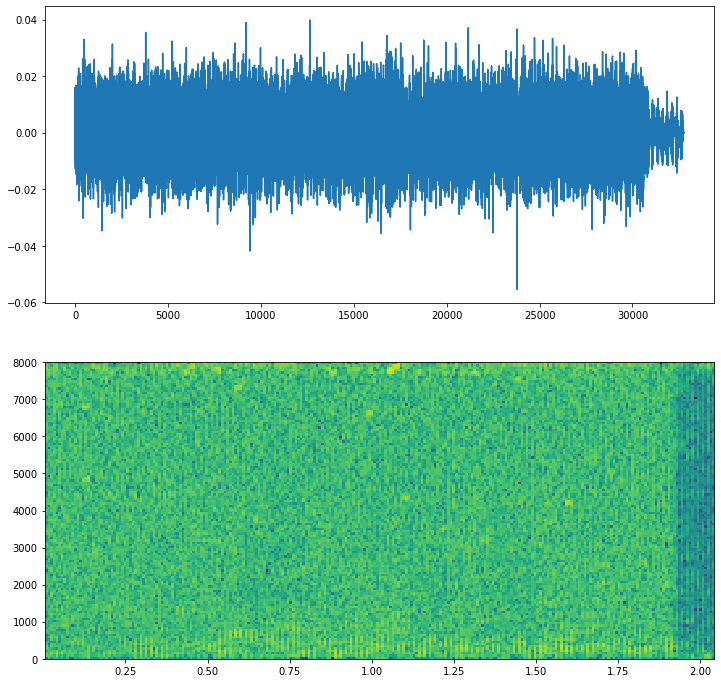

In [11]:
notebook.visualize_audio(pred_clean_arr, 'Pred clean signal')

Noisy signal


/home/matt/code/speech/notebooks/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


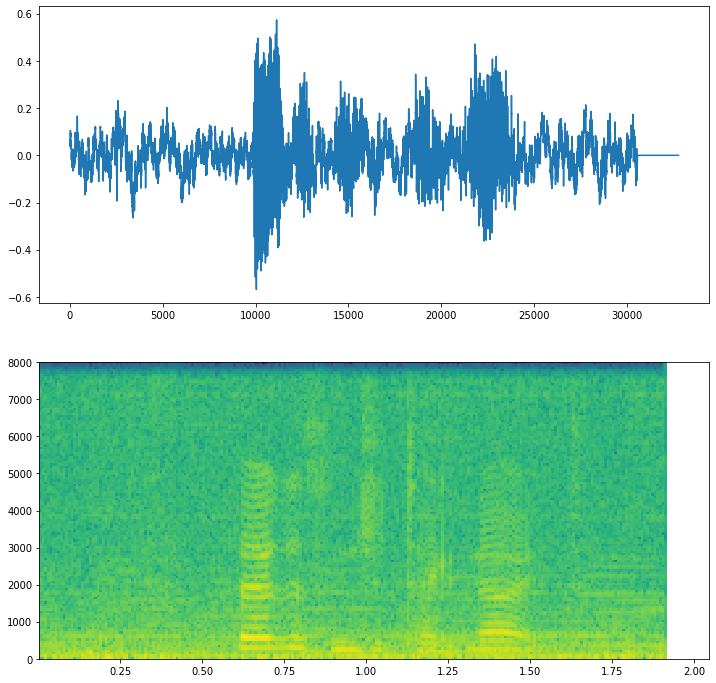

In [12]:
notebook.visualize_audio(dataset.noisy_data[IDX], 'Noisy signal')

Clean signal


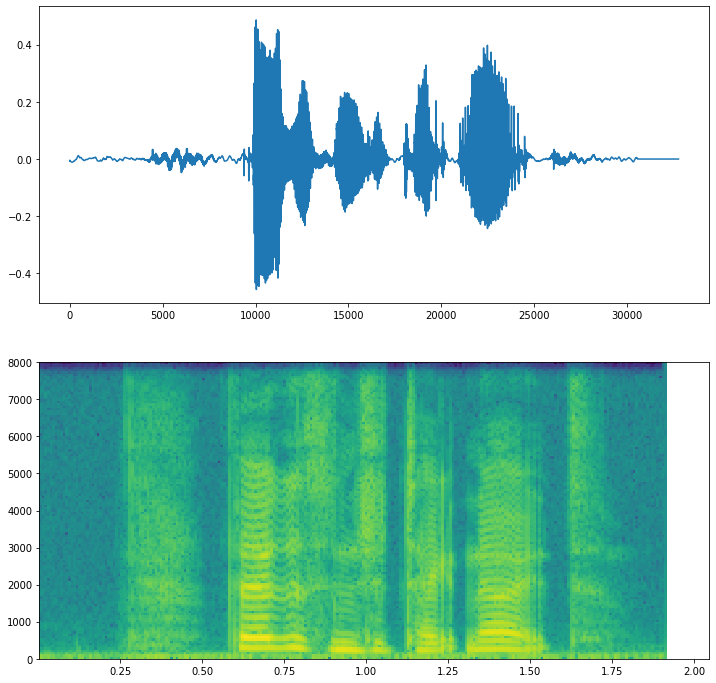

In [13]:
notebook.visualize_audio(dataset.clean_data[IDX], 'Clean signal')